This data presented here extracted from the census burau dataset. The data was split into train/test in approximately 2/3, 1/3 | proportions using MineSet's MIndUtil mineset-to-ml

I chose to work with this data sets because of the challanging it presnt and boost my knowlodge and skills as data scentist and after all my computer memory!
The data be use in this project is imbalanced dataset.
In real life imbalanced datasets can be found in many senario for example- fraud detection, cancer detection, manfacturing defects, online ads conversion etc.

**Table of contents**
1. Problem statement and hypothesis Generation
2. Data Exploration
3. Data Cleaning
>  Missing value imputaion 
3. Data Mainpulation & Feature Enineering
4. Machine learning 
> Imbalanced Techniques
>>1. Oversampling Techniques
>>2. Undersampling Tecniques
>>3. SMOTE
>
Naive Bayes
> XgBoost:
>>1. Homework-Top 20 features
>>2. AUC Threshold
>. 
SVM
>> Homework-Class weights

# 1. Problem Statement and hypothesis Generation



**The goals is given various feature, the aim is to build a predicvtive model determine the income level for people in the US. The income level are binned at below 50K and above 50K **

**Generating hupothesis is the most crucial step in building modles.**
The step should be predicted before, however, regarding to our data a hypothesis which influnce the outcome:
1. There is no significent impact of the varibales on the depandent variables.
2. There exists a significent impact of the variables on the depandent variables
and that could be :

- Age 
- class of worker 
- education 
- marital status
- Sex
- hispanic origin
- reason for unemployment
- capital losses
- tax
- detaild household and family
- deiaild household summary in houshold
- family members
- total person earnings
- country of birth
- citizenship
- owen business or self embloyed
- taxable income
- weeks worked in year. 
     

After deployed our list of hypothisis we should consider that working on imbalanced dataset is tricky, and simple classification algorithem tend to struggle.
The data is fairly large and high dimensional

# 2. Data Exploration

In [1]:
# and import libriies for data analysis and mainpulation
import pandas as pd
import numpy as np 
import os

In [117]:
# Get directory path
os.getcwd()

# Set path working dirctory
os.chdir('C:\\Users\\A\\Desktop\\D.S\\imbalanced-data')

# Load our data using pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [151]:
# Let's take a look at the data info
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
age                                 199523 non-null int64
class_of_worker                     199523 non-null object
industry_code                       199523 non-null int64
occupation_code                     199523 non-null int64
education                           199523 non-null object
wage_per_hour                       199523 non-null int64
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_par

We can see that train data has 199523 rows & 41 columns.
Test data has 99762 rows and 41 columns. There are a few things i want to mention before moving further:
1. we can see that train has amount of missing valuse heras test dosen't has any.
2. Below in the inforamtion bat mentioned that(memory usage) & + sign and that means pandas only estimate that amount but not the real one.
3. i'm using 4gb labtop and that concerned me. 
4. on the underhood Pandas tend treat integer and float follow by category better than objects for sufficent memory usage and faster computions.
Let's check our souluation to memory usage

In [8]:
# Lets take a look how pandas can do that
print(train.memory_usage(deep=True))
print(test.memory_usage(deep=True))

Index                                     42
age                                  1596184
class_of_worker                      8384187
industry_code                        1596184
occupation_code                      1596184
education                            9549966
wage_per_hour                        1596184
enrolled_in_edu_inst_lastwk          8785572
marital_status                       9776583
major_industry_code                 10454237
major_occupation_code                9725448
race                                 6950004
hispanic_origin                      7765500
sex                                  6792227
member_of_labor_union                8534210
reason_for_unemployment              8770027
full_parttime_employment_stat       10242042
capital_gains                        1596184
capital_losses                       1596184
dividend_from_Stocks                 1596184
tax_filer_status                     8242888
region_of_previous_residence         8635708
state_of_p

In [21]:
# It's obvouse that we gonna run out of memory 
# and regarding to convert data type i think that will be best idea
# because pandas store category types as integer under the hood.
# Let's take a look at first few rows 
train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [11]:
test.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000


In [3]:
# let's check the target variables
train.income_level.unique()

array([-50000,  50000], dtype=int64)

In [4]:
test.income_level.unique()

array(['-50000', ' 50000+.'], dtype=object)

The shape of these target levels are not same. This disparity will cause trouble in model evaluation. Being a binary classification problem, we can encode thses variables as 0 and 1

In [118]:
# But before encode the target variables we need to convert 
# to type integer
train['income_level'] = train.income_level.astype(int)

In [119]:
# Replace income_level shape
test['income_level']=test.income_level.str.replace('+','').str.replace('.', '')

# convert data type to integer
test['income_level'] = test.income_level.astype(int)

yesss did it! what just happend is that pandas cannot well with strings and strings that mixed with notaions even worse, so we used repalce method to replace (+, .) signs and then convert data type.  

In [120]:
# "label encoding", which allows you to convert each value in a 
# column to a number. Numerical labels are always 
# between 0 and n_categories-1.
# convert only income of level is for visualization ease
# initiate a model for encode target variable
from sklearn.preprocessing import LabelEncoder
# transfrom target varibale
convert = LabelEncoder()
train["income_level"] = convert.fit_transform(train["income_level"])
train[["income_level", "income_level"]].head()

# and encode test data set as well
convert = LabelEncoder()
test["income_level"] = convert.fit_transform(test["income_level"])
test[["income_level", "income_level"]].head()

,income_level,income_level
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [29]:
# Let's look at the severity of imbalanced clasess in the data
print(train.income_level.value_counts())
print(test.income_level.value_counts())

0    187141
1     12382
Name: income_level, dtype: int64
0    93576
1     6186
Name: income_level, dtype: int64


In [37]:
# take a look at severity of imbalanced 
print('percent of sevrity of imbalanced in train', round(train.income_level.value_counts()[1] / train.income_level.value_counts()[0] * 100, 2), 'percent')
print('percent of sevrity of imbalanced in test', round(test.income_level.value_counts()[1] / test.income_level.value_counts()[0] * 100, 2), 'percent')

percent of sevrity of imbalanced in train 6.62 percent
percent of sevrity of imbalanced in test 6.61 percent


Class0: 187141
Class1: 12382
prportaion: 15.11 : 1


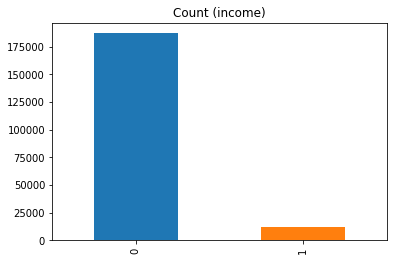

In [132]:
# its abviouse above how the severity among claases
# Let's examine further to get clear picture
# let's visualize it
%matplotlib inline

income_level = train.income_level.value_counts()
print('Class0:', income_level[0])
print('Class1:', income_level[1])
print('prportaion:', round(income_level[0]/income_level[1],2), ': 1')

income_level.plot(kind='bar', title='Count (income)')

We see that the majority class has a proportion equal of 94%. In other words with a decent ML algorithm our model will get 94% model accurecy, but our performance would depsnds on how good can we predict the minority clasess.

As seen in str() above, the columns in the both data are not as per column class given on the dataset. so let's deal with that.

In [6]:
# Tell pandas to display all columns
pd.set_option('display.max_columns', None)

Ok, now let's separete catigorical variables & numerical, to help i further analysis and visualizaton

In [121]:
# create a dataFrame of consisting if only spisfy feature type.

# subset categorical variables
cat_train = train.select_dtypes(include='object')
cat_test = test.select_dtypes(include='object')

# subset numerical variables
num_train = train.select_dtypes(include='integer')
num_test = test.select_dtypes(include='integer')

Great!, let's begin with numerical data so the best way to understand these variables is using histogram.

For ease understanding we have created a histogram overlapped with density curve. This curve will help us decipher the distrbution pattern more clearly.

C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


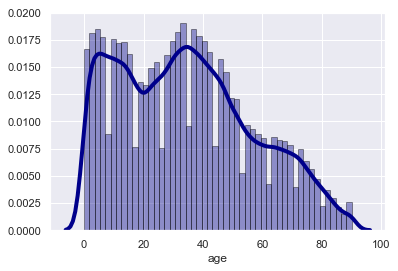

In [122]:
# import our visualization libriries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
%matplotlib inline

# Seaborn histogram style
sns.distplot(num_train['age'], hist=True, kde=True,
            bins=50, color = 'darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

As we can see the dataset consists of people aged from 0 to 90 with frequency of peaple declining with age. Now if we think of the problem below age 20 could earn >50K under normal circumstances? i dont think so, therefore we can bin this variable into age groups.

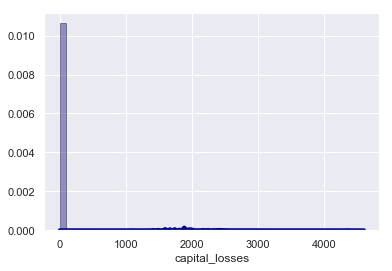

In [16]:
# Seaborn histogram style
sns.distplot(num_train['capital_losses'], hist=True, kde=True,
            bins=50, color = 'darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

In skewed distribution, normalizing is always an option. But, we need to look into this variable deeper as this insight isn’t significant enough for decision making. One option could be, to check for unique values. If they are less, we can tabulate the distribution (done in upcoming sections).

Furthermore, in classification problems, we should also plot numerical variables with dependent variable. This would help us determine the clusters (if exists) of classes 0 and 1

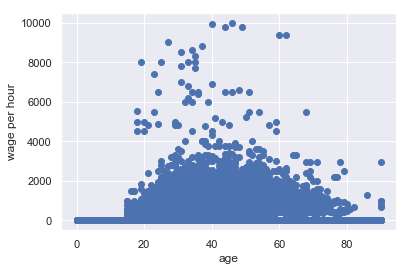

In [16]:
# Create scatter plot
#sns.scatterplot(x='age', y='wage_per_hour', data=num_train,hue=income_level)
age = num_train['age']
wage = num_train['wage_per_hour']
 
plt.scatter(age, wage, edgecolors='b')
plt.xlabel("age")
plt.ylabel("wage per hour")
plt.show()

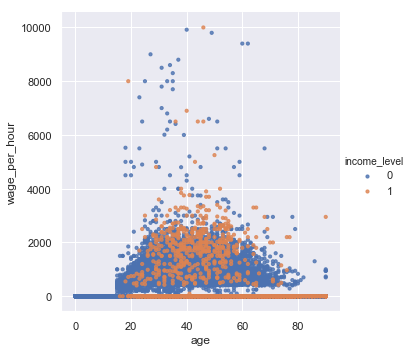

In [34]:
# seaborn libriry plot explain more than above.
sizes= [10, 40, 70, 100]
marker_size = pd.cut(num_train['age'], range(0, 2500, 500), labels=sizes)
sns.lmplot('age', 'wage_per_hour', data=num_train, hue='income_level', fit_reg=False, scatter_kws={'s':marker_size})


As we can see most of the peple having income_level 1, seem to fall in the age of 25-65 earning wage of 1000$ to 4000$ per hour. This plot further our assumption that age < 20 would have income_levle 0, hence we will bin this variable.

Identifying hidden trends is easier said than done, We need to look at a variable(s) from different angles to spot the hidden trends. Don’t stop here.

we can visualize our categorical variables as well. For categories, rather than a bland bar chart, a dodged bar chart provides more information. In dodged bar chart, we plot the categorical variables & dependent variable adjacent to each other.

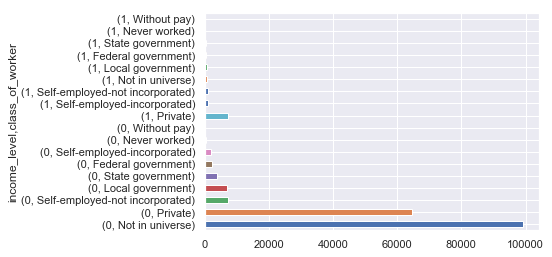

In [17]:
# plot calss of work respect to thier inocme level
cat_train['class_of_worker'].groupby(num_train['income_level']).value_counts().plot(kind='barh')

Though, no specific information is provided about Not in universe category. Let’s assume that, this response is given by people who got frustrated (due to any reason) while filling their census data. This variable looks imbalanced i.e. only two category levels seem to dominate. In such situation, a good practice is to combine levels having less than 5% frequency of the total category frequency.

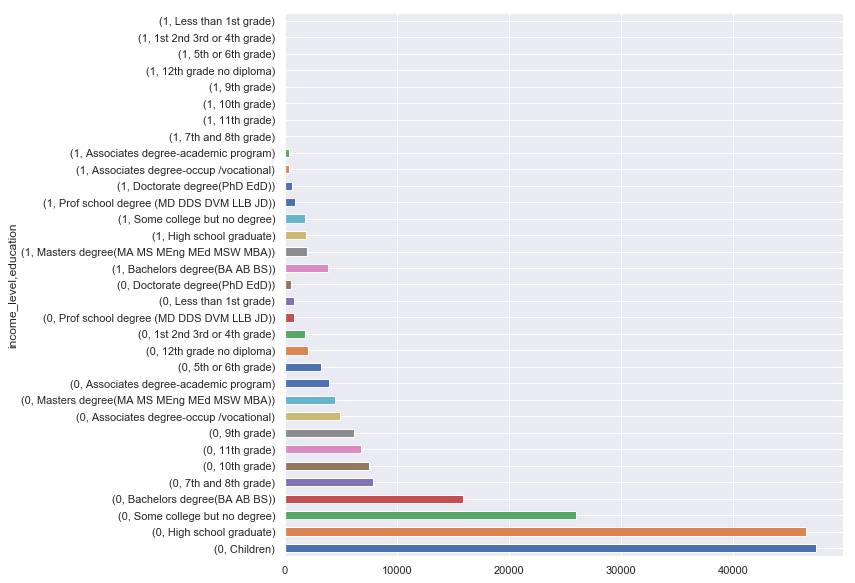

In [19]:
# plot education respect to thier income
cat_train['education'].groupby(num_train['income_level']).value_counts().plot(kind='barh', figsize=(10,10))

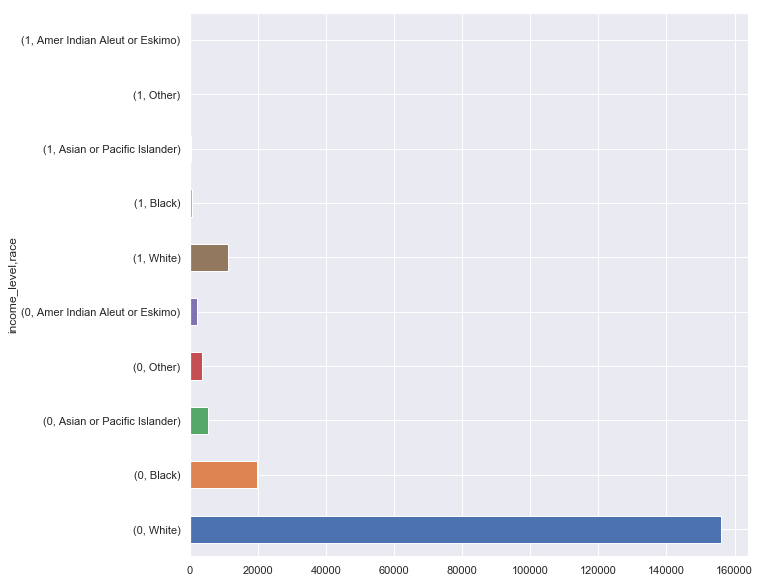

In [33]:
cat_train['race'].groupby(num_train['income_level']).value_counts().plot(kind='barh', figsize=(10,10))

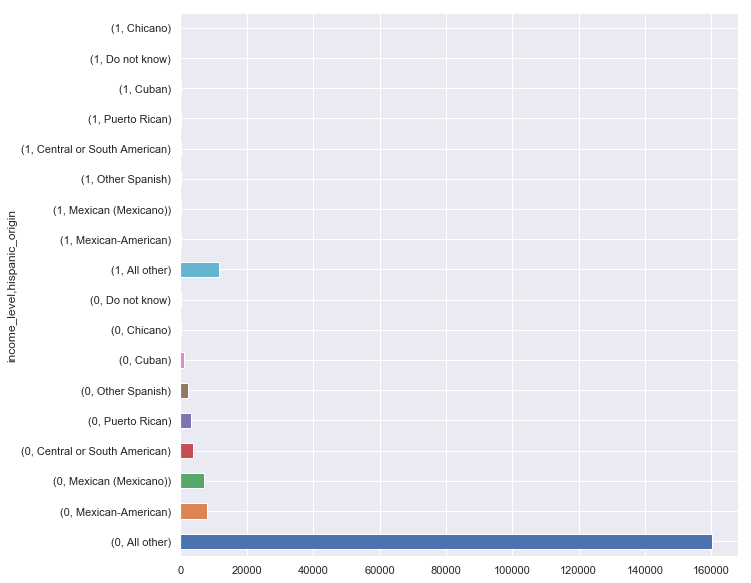

In [34]:
cat_train['hispanic_origin'].groupby(num_train['income_level']).value_counts().plot(kind='barh', figsize=(10,10))

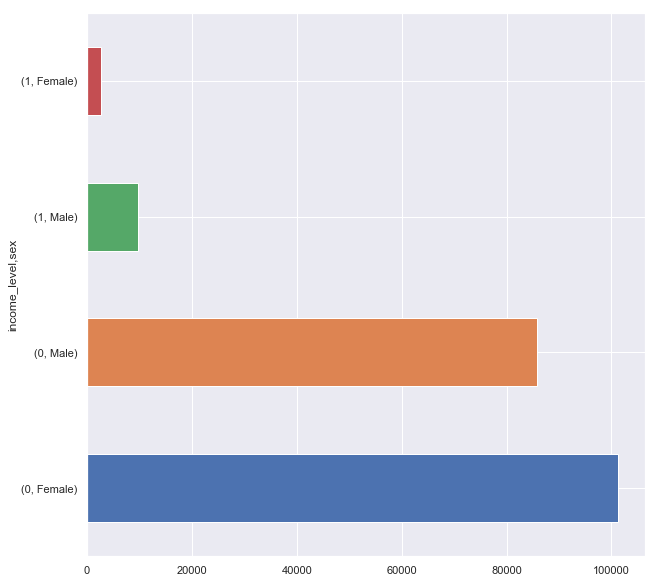

In [35]:
cat_train['sex'].groupby(num_train['income_level']).value_counts().plot(kind='barh', figsize=(10,10))

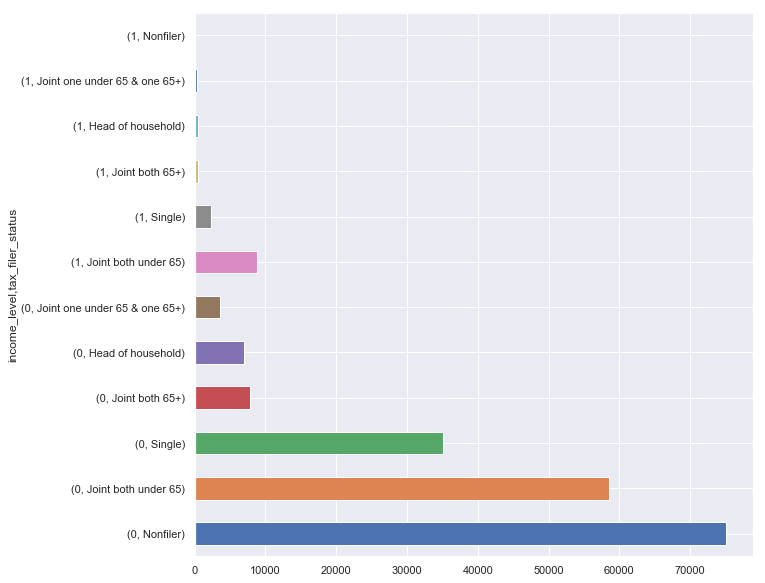

In [40]:
cat_train['tax_filer_status'].groupby(num_train['income_level']).value_counts().plot(kind='barh', figsize=(10,10))


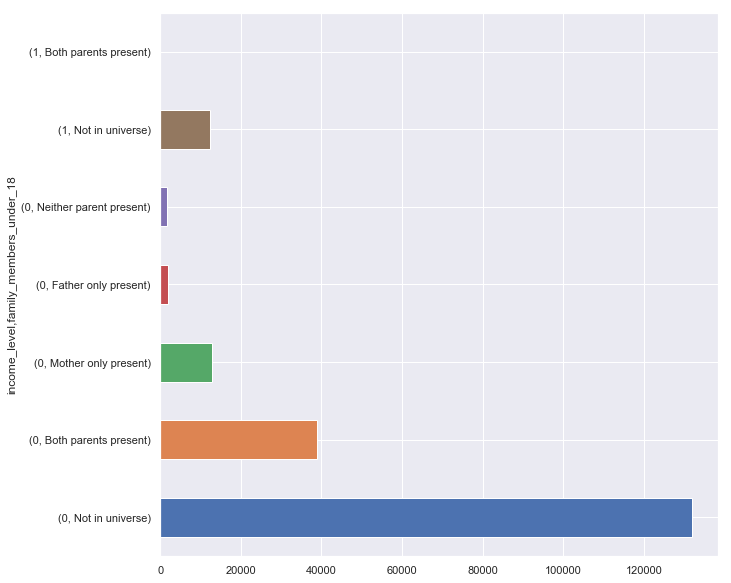

In [41]:
cat_train['family_members_under_18'].groupby(num_train['income_level']).value_counts().plot(kind='barh', figsize=(10,10))


Evidently, all children have income_level 0. Also, we can infer than Bachelors degree holders have the largest proportion of people have income_level 1. 

white people have income_level which they rank in highst and poorest among other race.

In sex category male tend have better income_level than female.

# 3. Data Cleaning

In [17]:
# check for missing value in numerical data
print(num_train.isnull().sum())
print(num_train.isnull().sum())

age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
income_level                  0
dtype: int64
age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
income_level                  0
dtype: int64


We see that numeric variables has no missing values. Good for us! While working on numeric variables,
a good practice is to check for correlation in numeric variables. 
correlation is one of thr most widely used and widely misunderstood statsitcal concepts. type of correlation in pandas:
1. pearson correlation coefficient
2. spearman's correlation cofficent
3. Kendall's Tau coefficent
and in term of our case use we will use peason for numrical and spearman for decrete variables.
**pandas can quickly calculate correlation between all columns in a dataframe. The user can also specify the correlation method: Spearman, Pearson, or Kendall. If no method is specified, Pearson is used by default.** 


In [18]:
# pearson correlation by default
num_train.corr()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
age,1.000000,0.157822,0.117414,0.036938,0.053590,0.063351,0.104976,0.140887,-0.002265,0.674844,0.206181,0.004413,0.135720
industry_code,0.157822,1.000000,0.563493,0.165980,0.066017,0.072586,0.012774,0.642096,0.252694,0.476475,0.754472,0.003430,0.196190
occupation_code,0.117414,0.563493,1.000000,0.194498,0.002534,0.043680,-0.026726,0.515554,0.228952,0.438680,0.655613,-0.003140,0.013414
wage_per_hour,0.036938,0.165980,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.054051,0.113094,0.195687,0.002283,0.024528
capital_gains,0.053590,0.066017,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.015048,0.051530,0.083549,0.005243,0.240725
capital_losses,0.063351,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.084255,0.024116,0.075391,0.100762,0.000096,0.147417
dividend_from_Stocks,0.104976,0.012774,-0.026726,-0.005731,0.131476,0.042427,1.000000,0.007206,-0.004885,0.054585,0.013823,0.001913,0.175779
num_person_Worked_employer,0.140887,0.642096,0.515554,0.191543,0.058015,0.084255,0.007206,1.000000,0.240553,0.463334,0.747302,0.018774,0.222684
business_or_self_employed,-0.002265,0.252694,0.228952,0.054051,0.015048,0.024116,-0.004885,0.240553,1.000000,0.177448,0.265872,0.007377,0.040473
veterans_benefits,0.674844,0.476475,0.438680,0.113094,0.051530,0.075391,0.054585,0.463334,0.177448,1.000000,0.532279,0.003122,0.140930


In [19]:
# highlight correlation method for table 
num_train.corr(method='pearson').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
age,1.0,0.16,0.12,0.037,0.054,0.063,0.1,0.14,-0.0023,0.67,0.21,0.0044,0.14
industry_code,0.16,1.0,0.56,0.17,0.066,0.073,0.013,0.64,0.25,0.48,0.75,0.0034,0.2
occupation_code,0.12,0.56,1.0,0.19,0.0025,0.044,-0.027,0.52,0.23,0.44,0.66,-0.0031,0.013
wage_per_hour,0.037,0.17,0.19,1.0,-0.0011,0.011,-0.0057,0.19,0.054,0.11,0.2,0.0023,0.025
capital_gains,0.054,0.066,0.0025,-0.0011,1.0,-0.013,0.13,0.058,0.015,0.052,0.084,0.0052,0.24
capital_losses,0.063,0.073,0.044,0.011,-0.013,1.0,0.042,0.084,0.024,0.075,0.1,9.6e-05,0.15
dividend_from_Stocks,0.1,0.013,-0.027,-0.0057,0.13,0.042,1.0,0.0072,-0.0049,0.055,0.014,0.0019,0.18
num_person_Worked_employer,0.14,0.64,0.52,0.19,0.058,0.084,0.0072,1.0,0.24,0.46,0.75,0.019,0.22
business_or_self_employed,-0.0023,0.25,0.23,0.054,0.015,0.024,-0.0049,0.24,1.0,0.18,0.27,0.0074,0.04
veterans_benefits,0.67,0.48,0.44,0.11,0.052,0.075,0.055,0.46,0.18,1.0,0.53,0.0031,0.14


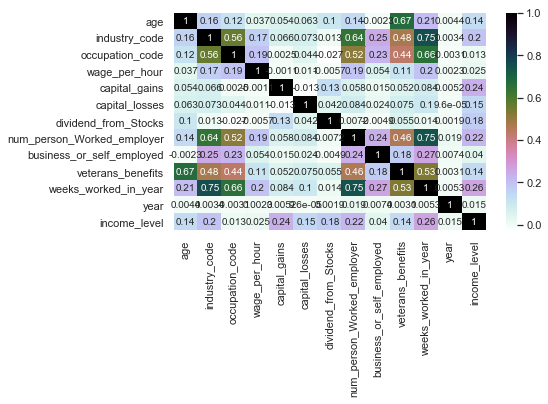

In [118]:
# Heatmap plot corelate with correlation
plt.figure(figsize=(7,4))
sns.heatmap(num_train.corr(),annot=True, cmap='cubehelix_r')
plt.show()

**Generally, if the correlation between a pair of variables is greater than 0.5-0.6 we should consider drop one of those varibales.**

In [123]:
train.drop('weeks_worked_in_year', axis=1, inplace=True)

In [124]:
test.drop('weeks_worked_in_year', axis=1, inplace=True)


The variable weeks_worked_in_year gets removed. For hygiene purpose, we’ve removed that variable from test data too. It’s not necessary though!

**Now, let’s check for missing values in categorical data. We’ll use base sapply() to find out percentage of missing values per column.**

In [282]:
# Cheack missing values for categorical varibales
print(cat_train.isnull().sum()/len(cat_train)*100)
print(cat_test.isnull().sum()/len(cat_test)*100)

class_of_worker                      0.000000
education                            0.000000
enrolled_in_edu_inst_lastwk          0.000000
marital_status                       0.000000
major_industry_code                  0.000000
major_occupation_code                0.000000
race                                 0.000000
hispanic_origin                      0.438045
sex                                  0.000000
member_of_labor_union                0.000000
reason_for_unemployment              0.000000
full_parttime_employment_stat        0.000000
tax_filer_status                     0.000000
region_of_previous_residence         0.000000
state_of_previous_residence          0.354846
d_household_family_stat              0.000000
d_household_summary                  0.000000
migration_msa                       49.967172
migration_reg                       49.967172
migration_within_reg                49.967172
live_1_year_ago                      0.000000
migration_sunbelt                 

We find that some of the variables have ~50% missing values. High proportion of missing value can be attributed to difficulty in data collection. For now, we’ll remove these category levels.

In [125]:
# Set 0 as unavailable- train data
cat_train.fillna(0)

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_parttime_employment_stat,tax_filer_status,region_of_previous_residence,state_of_previous_residence,d_household_family_stat,d_household_summary,migration_msa,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,0,0,0,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,0,0,0,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,0,0,0,Not in universe under 1 year old,0,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,Not in universe
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,0,0,0,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born 

In [12]:
# double check if effect take  place
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 28 columns):
class_of_worker                     199523 non-null object
education                           199523 non-null object
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_parttime_employment_stat       199523 non-null object
tax_filer_status                    199523 non-null object
region_of_previous_residence        199523 non-null object
state_of_previous_residence         198815 non-null object
d_ho

As with many aspect of the data scientist world there is no single answer on how to approach this probelm that dealing with object type or category. So we will anaylysi them and go through them one by one.

# 4. Data Mainpulation

We are approaching towards machine learning stage. But, machine learning algorithms return better accuracy when the data set has clear signals to offer. Specially, in case of imbalanced classification, we should try our best to shape the data such that we can derive maximum information about minority class.

In [98]:
# sort data by income-level
train.sort_values(by='income_level')

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,d_household_family_stat,d_household_summary,migration_msa,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,num_person_Worked_employer,family_members_under_18,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,0,0,0,Not in universe under 1 year old,0,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,95,0
130868,68,Not in universe,0,0,11th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,0
130869,4,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,94,0
130870,26,Private,12,14,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Technicians and related support,White,All other,Male,No,Not in universe,Children or Armed Forces,0,0,2,Joint both under 65,Northeast,Michigan,Householder,Householder,MSA to MSA,Same county,Same county,No,No,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,0
130871,8,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,0,0,0,Not in universe under 1 year old,0,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,95,0
130872,56,Private,11,28,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Protective services,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,0,0,0,Not in universe under 1 year old,0,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,95,0
130873,46,State government,47,10,High school graduate,0,Not in universe,Married-civilian spouse present,Public administration,Professional specialty,White,Mexican-American,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States

In previous analysis, we saw that categorical variables have several levels with low frequencies. Such levels don’t help as chances are they wouldn’t be available in test set. We’ll do this hygiene check anyways, in coming steps. To combine levels, a simple pandas bolean dose the trick. After combining, the new category level will named as ‘Other’.

In [126]:
# combine factor level with less than 5% values
# for train and test dataset
train['other'] = train.income_level < 5/100
test['other'] = test.income_level < 5/100

Time for hygiene check. Let’s check if there exists a mismatch between categorical levels in train and test data. Either you can write a function for accomplish this. We’ll rather use a hack derived from mlr package

In [158]:
# double check data set in train dataset
cat_train.columns.get_level_values(0)

Index(['class_of_worker', 'education', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'family_members_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'fill_questionnaire_veteran_admin'],
      dtype='object')

In [159]:
# double check data set in test dataset
cat_test.columns.get_level_values(0)

Index(['class_of_worker', 'education', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'family_members_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'fill_questionnaire_veteran_admin'],
      dtype='object')

Before proceeding to the modeling stage, let’s look at numeric variables and reflect on possible ways for binning. Since a histogram wasn’t enough for us to make decision, let’s create simple tables representing counts of unique values in these variables as shown:

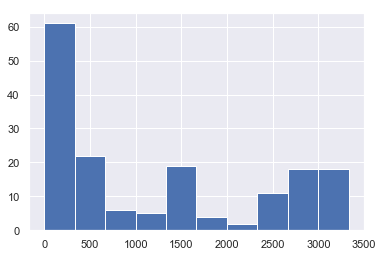

In [184]:
num_train.groupby('age').income_level.value_counts().sort_values().hist()

In [182]:
# group age with income-level values
num_train.groupby('age').income_level.value_counts().sort_values()

age  income_level
17   1                  1
18   1                  1
16   1                  1
89   1                  3
88   1                  5
87   1                  5
19   1                  5
86   1                  7
84   1                  7
82   1                  7
21   1                  8
83   1                 10
85   1                 11
20   1                 12
81   1                 18
22   1                 23
90   1                 23
23   1                 24
79   1                 24
80   1                 25
78   1                 29
77   1                 36
24   1                 38
76   1                 39
72   1                 42
73   1                 45
74   1                 46
75   1                 48
71   1                 49
70   1                 55
                     ... 
17   0               2761
23   0               2765
0    0               2839
16   0               2881
28   0               2884
38   0               2894
37   0              

In [168]:
# display all unique values of ages
num_train.age.unique()

array([73, 58, 18,  9, 10, 48, 42, 28, 47, 34,  8, 32, 51, 46, 26, 13, 39,
       16, 35, 12, 27, 56, 55,  2,  1, 37,  4, 63, 25, 81, 11, 30,  7, 66,
       84, 52,  5, 36, 72, 61, 41, 90, 49,  6,  0, 33, 57, 50, 24, 17, 53,
       40, 54, 22, 29, 85, 38, 76, 21, 31, 74, 19, 15,  3, 43, 68, 71, 45,
       62, 23, 69, 75, 44, 59, 60, 64, 65, 70, 67, 78, 20, 14, 83, 86, 89,
       77, 79, 82, 80, 87, 88], dtype=int64)

In [48]:
# age distrbuation across data
num_train.age.describe()

count    199523.000000
mean         34.494199
std          22.310895
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64

After this activity, we are clear that more than 70-80% of the observations are 0 in these variables.
it will be interested to see how 0-25, 26-65, 66-90 works 

In [127]:
# let us create age and determine correlation with income_level
# bin age variable 0-30 31-60 61 - 90
train['AgeBand'] = pd.cut(train['age'], 5)
train[['AgeBand', 'income_level']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,income_level
0,"(-0.09, 18.0]",0.000051
1,"(18.0, 36.0]",0.050479
2,"(36.0, 54.0]",0.146206
3,"(54.0, 72.0]",0.084812
4,"(72.0, 90.0]",0.030291


In [128]:
# same to the previous step for the test dataset
test['AgeBand'] = pd.cut(test['age'], 5)
test[['AgeBand', 'income_level']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,income_level
0,"(-0.09, 18.0]",0.000000
1,"(18.0, 36.0]",0.047946
2,"(36.0, 54.0]",0.146199
3,"(54.0, 72.0]",0.089101
4,"(72.0, 90.0]",0.028523


In [129]:
# let's convert it from object to category type
train['AgeBand']= train.AgeBand.astype('category')

In [130]:
#Bin numeric variables with Zero and MoreThanZero
train['wage_per_hour'] = train.wage_per_hour > 0
train['capital_gains'] = train.capital_gains > 0
train['capital_losses']= train.capital_losses> 0 
train['dividend_from_stocks'] = train.dividend_from_Stocks> 0

test['wage_per_hour'] = test.wage_per_hour > 0
test['capital_gains'] = test.capital_gains > 0
test['capital_losses']= test.capital_losses> 0 
test['dividend_from_stocks'] = test.dividend_from_Stocks> 0

# 5. Machine Learning

Making predictions on this data should atleast give us ~94% accuracy. However, while working on imbalanced problems, accuracy is considered to be a poor evaluation metrics because:
Accuracy is calculated by ratio of correct classifications / incorrect classifications.
This metric would largely tell us how accurate our predictions are on the majority class (since it comprises 94% of values). But, we need to know if we are predicting minority class correctly. We’re doomed here.

In [290]:
print(train.shape)
print(test.shape)

(199523, 43)
(99762, 43)


In [20]:
train.dtypes

age                                    int64
class_of_worker                       object
industry_code                          int64
occupation_code                        int64
education                             object
wage_per_hour                           bool
enrolled_in_edu_inst_lastwk           object
marital_status                        object
major_industry_code                   object
major_occupation_code                 object
race                                  object
hispanic_origin                       object
sex                                   object
member_of_labor_union                 object
reason_for_unemployment               object
full_parttime_employment_stat         object
capital_gains                           bool
capital_losses                          bool
dividend_from_Stocks                   int64
tax_filer_status                      object
region_of_previous_residence          object
state_of_previous_residence           object
d_househol

In [131]:
# convert bool datatype to integer
test['wage_per_hour']= test.wage_per_hour.astype(int)
test['capital_gains']= test.capital_gains.astype(int)
test['capital_losses']= test.capital_losses.astype(int)
test['other']= test.other.astype(int)
test['dividend_from_stocks']= test.dividend_from_Stocks.astype(int)

In [21]:
# There are many ways to deal with categorical data type to convert them
# to integer a prepration for machine learning as machine learning dose not
# handel it except integer data types.
# the methode we going to use in hispanic-origin called Replace values
train.hispanic_origin.value_counts()

All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Do not know                     306
Chicano                         304
Name: hispanic_origin, dtype: int64

In [132]:
# defining a mapping via a hard coded dictionary
# is easy when the number of categories is low
#This will be useful when the categories count is high and you don't want to type out each mapping. You will store the category names in a list called
#labels and then zip it to a seqeunce of numbers and iterate over it.

label = train['hispanic_origin'].astype('category').cat.categories.tolist()
replace_map = {'hispanic_origin': {k: v for k,v in zip(label,list(range(1,len(label)+1)))}}
print(replace_map)

labell = test['hispanic_origin'].astype('category').cat.categories.tolist()
replace_map1 = {'hispanic_origin': {k: v for k,v in zip(labell,list(range(1,len(labell)+1)))}}
print(replace_map1)

{'hispanic_origin': {'All other': 1, 'Central or South American': 2, 'Chicano': 3, 'Cuban': 4, 'Do not know': 5, 'Mexican (Mexicano)': 6, 'Mexican-American': 7, 'Other Spanish': 8, 'Puerto Rican': 9}}
{'hispanic_origin': {' All other': 1, ' Central or South American': 2, ' Chicano': 3, ' Cuban': 4, ' Do not know': 5, ' Mexican (Mexicano)': 6, ' Mexican-American': 7, ' NA': 8, ' Other Spanish': 9, ' Puerto Rican': 10}}


In [133]:
# add results to the train dataset
train.replace(replace_map, inplace=True)
print(train.head())
# add results to the test dataset
test.replace(replace_map1, inplace=True)
print(test.head())

   age                 class_of_worker  industry_code  occupation_code  \
0   73                 Not in universe              0                0   
1   58  Self-employed-not incorporated              4               34   
2   18                 Not in universe              0                0   
3    9                 Not in universe              0                0   
4   10                 Not in universe              0                0   

                    education  wage_per_hour enrolled_in_edu_inst_lastwk  \
0        High school graduate          False             Not in universe   
1  Some college but no degree          False             Not in universe   
2                  10th grade          False                 High school   
3                    Children          False             Not in universe   
4                    Children          False             Not in universe   

  marital_status          major_industry_code  \
0        Widowed  Not in universe or children   


In [134]:
# convert all categorical varibles in our dataset 
# from object categorical in order to transform them into integers type
# for machine learning stage 
cat_train = cat_train.astype('category')
cat_test = cat_test.astype('category')

In [135]:
# As we menthioned earlier about how many methode to deal with such object
# type of data and one of them is cat.codes and that simply by hot encode
# all data in ome dimention unlike one hot encode of machine learning
# we chose this because our data is a mix or cardinal, ordinal,
# and as we see cat.codes consumed alot of time to do so but only in this
# situation because our computer hredare cant handle high dimentions data.
cat_train['education'] = cat_train['education'].cat.codes
cat_train['enrolled_in_edu_inst_lastwk'] = cat_train['enrolled_in_edu_inst_lastwk'].cat.codes
cat_train['marital_status'] = cat_train['marital_status'].cat.codes
cat_train['major_industry_code'] = cat_train['major_industry_code'].cat.codes
cat_train['major_occupation_code'] = cat_train['major_occupation_code'].cat.codes
cat_train['race'] = cat_train['race'].cat.codes
cat_train['hispanic_origin'] = cat_train['hispanic_origin'].cat.codes
cat_train['sex'] = cat_train['sex'].cat.codes
cat_train['member_of_labor_union'] = cat_train['member_of_labor_union'].cat.codes
cat_train['reason_for_unemployment'] = cat_train['reason_for_unemployment'].cat.codes
cat_train['full_parttime_employment_stat'] = cat_train['full_parttime_employment_stat'].cat.codes
cat_train['tax_filer_status'] = cat_train['tax_filer_status'].cat.codes
cat_train['region_of_previous_residence'] = cat_train['region_of_previous_residence'].cat.codes
cat_train['state_of_previous_residence'] = cat_train['state_of_previous_residence'].cat.codes
cat_train['d_household_family_stat'] = cat_train['d_household_summary'].cat.codes
cat_train['migration_msa'] = cat_train['migration_msa'].cat.codes
cat_train['migration_reg'] = cat_train['migration_reg'].cat.codes
cat_train['migration_within_reg'] = cat_train['migration_within_reg'].cat.codes
cat_train['live_1_year_ago'] = cat_train['live_1_year_ago'].cat.codes
cat_train['migration_sunbelt'] = cat_train['migration_sunbelt'].cat.codes
cat_train['family_members_under_18'] = cat_train['family_members_under_18'].cat.codes
cat_train['country_father'] = cat_train['country_father'].cat.codes
cat_train['country_mother'] = cat_train['country_mother'].cat.codes
cat_train['citizenship'] = cat_train['citizenship'].cat.codes
cat_train['fill_questionnaire_veteran_admin'] = cat_train['fill_questionnaire_veteran_admin'].cat.codes

Looks like, my machine gave up at these oneHotEncoders and other machine learning encoders, so do it mainulay). It’s keep giving me memory error and this code hasn’t executed. Look at the havoc this is creating in my poor machine:

In [136]:
# same as the previouse step except its for test dataset
cat_test['education'] = cat_test['education'].cat.codes 
cat_test['enrolled_in_edu_inst_lastwk'] = cat_test['enrolled_in_edu_inst_lastwk'].cat.codes
cat_test['marital_status'] = cat_test['marital_status'].cat.codes
cat_test['major_industry_code'] = cat_test['major_industry_code'].cat.codes
cat_test['major_occupation_code'] = cat_test['major_occupation_code'].cat.codes
cat_test['race'] = cat_test['race'].cat.codes
cat_test['hispanic_origin'] = cat_test['hispanic_origin'].cat.codes
cat_test['sex'] = cat_test['sex'].cat.codes
cat_test['member_of_labor_union'] = cat_test['member_of_labor_union'].cat.codes
cat_test['reason_for_unemployment'] = cat_test['reason_for_unemployment'].cat.codes
cat_test['full_parttime_employment_stat'] = cat_test['full_parttime_employment_stat'].cat.codes
cat_test['tax_filer_status'] = cat_test['tax_filer_status'].cat.codes
cat_test['region_of_previous_residence'] = cat_test['region_of_previous_residence'].cat.codes
cat_test['state_of_previous_residence'] = cat_test['state_of_previous_residence'].cat.codes
cat_test['d_household_family_stat'] = cat_test['d_household_summary'].cat.codes
cat_test['migration_msa'] = cat_test['migration_msa'].cat.codes
cat_test['migration_reg'] = cat_test['migration_reg'].cat.codes
cat_test['migration_within_reg'] = cat_test['migration_within_reg'].cat.codes
cat_test['live_1_year_ago'] = cat_test['live_1_year_ago'].cat.codes
cat_test['migration_sunbelt'] = cat_test['migration_sunbelt'].cat.codes
cat_test['family_members_under_18'] = cat_test['family_members_under_18'].cat.codes
cat_test['country_father'] = cat_test['country_father'].cat.codes
cat_test['country_mother'] = cat_test['country_mother'].cat.codes
cat_test['citizenship'] = cat_test['citizenship'].cat.codes
cat_test['fill_questionnaire_veteran_admin'] = cat_test['fill_questionnaire_veteran_admin'].cat.codes
cat_train['class_of_worker'] = cat_train['class_of_worker'].cat.codes
cat_train['d_household_summary'] = cat_train['d_household_summary'].cat.codes
cat_train['country_self'] = cat_train['country_self'].cat.codes
cat_test['class_of_worker'] = cat_test['class_of_worker'].cat.codes
cat_test['d_household_summary'] = cat_test['d_household_summary'].cat.codes
cat_test['country_self'] = cat_test['country_self'].cat.codes

In [137]:
# let's combine all the results into original data frame
train = pd.concat([cat_train, num_train], axis=1)
test = pd.concat([cat_test, num_test], axis=1)

In [65]:
test.dtypes

class_of_worker                      int8
education                            int8
enrolled_in_edu_inst_lastwk          int8
marital_status                       int8
major_industry_code                  int8
major_occupation_code                int8
race                                 int8
hispanic_origin                      int8
sex                                  int8
member_of_labor_union                int8
reason_for_unemployment              int8
full_parttime_employment_stat        int8
tax_filer_status                     int8
region_of_previous_residence         int8
state_of_previous_residence          int8
d_household_family_stat              int8
d_household_summary                  int8
migration_msa                        int8
migration_reg                        int8
migration_within_reg                 int8
live_1_year_ago                      int8
migration_sunbelt                    int8
family_members_under_18              int8
country_father                    

In [31]:
print(train.shape)
print(test.shape)

(199523, 41)
(99762, 41)


alright, we will start the process of machine learning using the FeatureSelector for efficent machine learning workflow.
Feature selection is a process where select those feature in dataset that contribute most of the predicton variable.
There are alot of benifits of performing feature selcetion before modeling the dataset and it goes of reduce overfitng, imporve accuracy and reduces traing time.

In [138]:
# combine the data together 
data = pd.concat([train,test])
print(data.shape)

# split our data into X and y
X,y = data.iloc[:,:-1], data.iloc[:,-1]

# import split skelarn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=99)

(299285, 41)


C:\Users\A\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 28 (0.108905)
2. feature 30 (0.108673)
3. feature 34 (0.096385)
4. feature 32 (0.088308)
5. feature 1 (0.056699)
6. feature 29 (0.054584)
7. feature 35 (0.042706)
8. feature 8 (0.041190)
9. feature 4 (0.036780)
10. feature 38 (0.034999)
11. feature 5 (0.026971)
12. feature 33 (0.026725)
13. feature 0 (0.023830)
14. feature 23 (0.019735)
15. feature 3 (0.018262)
16. feature 24 (0.018146)
17. feature 12 (0.017499)
18. feature 36 (0.014163)
19. feature 9 (0.013365)
20. feature 15 (0.012242)
21. feature 25 (0.012156)
22. feature 31 (0.011348)
23. feature 11 (0.011147)
24. feature 18 (0.010771)
25. feature 19 (0.010718)
26. feature 17 (0.010680)
27. feature 16 (0.010620)
28. feature 14 (0.009831)
29. feature 6 (0.009753)
30. feature 21 (0.009608)
31. feature 7 (0.007865)
32. feature 26 (0.005813)
33. feature 20 (0.005434)
34. feature 39 (0.003641)
35. feature 13 (0.003530)
36. feature 10 (0.002343)
37. feature 27 (0.002243)
38. feature 37 (0.002003)
39. feature 2

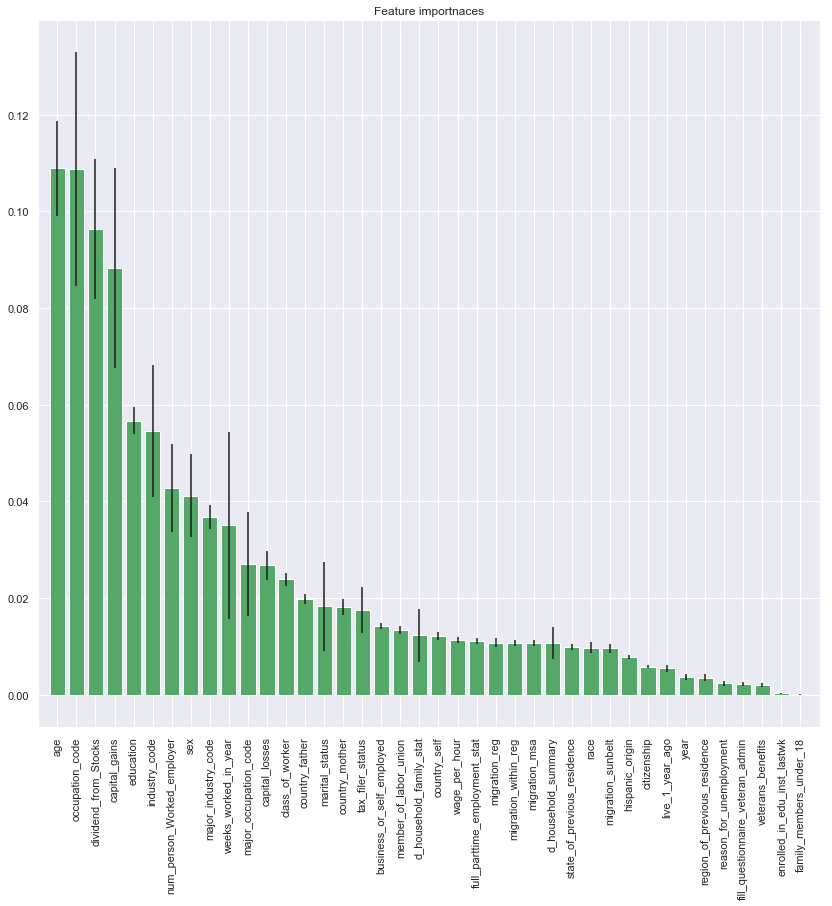

In [68]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_ ], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
    
plt.figure(1, figsize=(14, 13))
plt.title('Feature importnaces')
plt.bar(range(X_train.shape[1]), importances[indices], color='g', yerr=std[indices], align='center')

plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In simple words, you can understand that the age variable major_occupation_code would provide highest information to the model followed by other variables in descending order. This chart is deduced using a tree algorithm, where at every split, the information is calculated using reduction in entropy (homogeneity). Let’s keep this knowledge safe, we might use it in coming steps.

Now, we’ll try to make our data balanced using various techniques such as over sampling, undersampling and SMOTE. In SMOTE, the algorithm looks at n nearest neighbors, measures the distance between them and introduces a new observation at the center of n observations. While proceeding, we must keep in mind that these techniques have their own drawbacks such as:
undersampling leads to loss of information
oversampling leads to overestimation of minority class

Let's apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

For ease of visualization, let's create a small unbalanced sample dataset using the make_classification method:

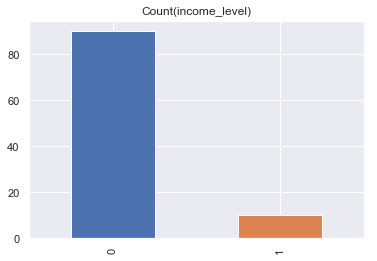

In [69]:
# we will use Python imbalanced-learn module
# and we going to visualize each sampling techniques
import imblearn

M, z = make_classification(n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

train = pd.DataFrame(M)
train['income_level'] = z
train.income_level.value_counts().plot(kind='bar', title='Count(income_level)');


We will also create a 2-dimensional plot function, plot_2d_space, to see the data distribution:

In [70]:
def plot_2d_space(X, y, label='income_level'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y_train), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Because the dataset has many dimensions (features) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

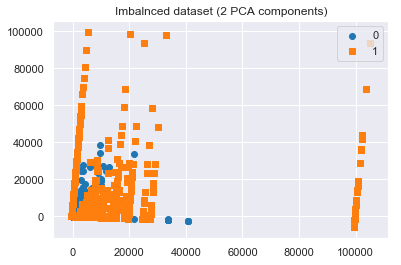

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(X_train)

plot_2d_space(x_train, y_train, 'Imbalnced dataset (2 PCA components)')

We’ll start with naive Bayes, an algorithms based on bayes theorem. In case of high dimensional data like text-mining, naive Bayes tends to do wonders in accuracy. It works on categorical data. In case of numeric variables, a normal distribution is considered for these variables and a mean and standard deviation is calculated. Then, using some standard z-table calculations probabilities can be estimated for each of your continuous variables to make the naive Bayes classifier.
We’ll use naive Bayes on all 4 data sets (imbalanced, oversample, undersample and SMOTE) and compare the prediction accuracy using diffrient methode.

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

naive = GaussianNB()
naive.fit(X_train, y_train)

## Make prediction with new model
y_pred = naive.predict(X_test)

from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, SCORERS, accuracy_score
## Calculate the accuracy rate of model and compare it to the null accuracy

# Calculte accuracy of mmodel
print('Model Accuracy',metrics.accuracy_score(y_test, y_pred))

# Calculate null accuracy
print('Null Acuuracy',metrics.accuracy_score(y_test, [0]*len(y_test)))

# Calculte the mean of y_test (AKA the precentage of 1's)
print("Precentage of 1's",y_test.mean())

# One minus that number will be the percentage of 0's.  This means that if you 
# predict all 0's, you will be correct 1-y_test-mean() percent of the time.
print("Precentage of 0's",1 - y_test.mean())

## Generate a confusion matrix for your predictions.  Use this to calculate the
## sensitivity and specificity of your model.

# Take alook at the confustion matrix
con_mat = metrics.confusion_matrix(y_test, y_pred)
print('\nCon_Matrix\n',con_mat)


# Let's define our true posititves, false positives,
# true negatives, and false negatives 
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat[1][1]
false_pos = con_mat[0][1]


# Sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print ('Percent of Senstivity',sensitivity)

# Specificity: percent of correct predictions when reference 
# value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print ('Percent of specificity',specificity)

Model Accuracy 0.7872262224969511
Null Acuuracy 0.9359473411631054
Precentage of 1's 0.0640526588368946
Precentage of 0's 0.9359473411631054

Con_Matrix
 [[43926 12097]
 [  639  3195]]
Percent of Senstivity 0.8333333333333334
Percent of specificity 0.7840708280527641


# Now let do ti with random under samplel

Removed indexes: [ 92865 129183  48107 ... 239406 239413 239425]


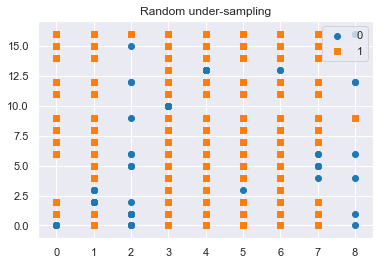

In [73]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train,y_train)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [74]:
naive = GaussianNB()
naive.fit(X_rus, y_rus)

## Make prediction with new model
y_pred = naive.predict(X_test)

## Calculate the accuracy rate of model and compare it to the null accuracy

 
# Calculte accuracy of mmodel
print('Model Accuracy',metrics.accuracy_score(y_test, y_pred))

# Calculate null accuracy
print('Null Acuuracy',metrics.accuracy_score(y_test, [0]*len(y_test)))

# Calculte the mean of y_test (AKA the precentage of 1's)
print("Precentage of 1's",y_test.mean())

# One minus that number will be the percentage of 0's.  This means that if you 
# predict all 0's, you will be correct 1-y_test-mean() percent of the time.
print("Precentage of 0's",1 - y_test.mean())

## Generate a confusion matrix for your predictions.  Use this to calculate the
## sensitivity and specificity of your model.

# Take alook at the confustion matrix
con_mat = metrics.confusion_matrix(y_test, y_pred)
print('\nCon_Matrix\n',con_mat)


# Let's define our true posititves, false positives,
# true negatives, and false negatives 
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat[1][1]
false_pos = con_mat[0][1]


# Sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print ('Percent of Senstivity',sensitivity)

# Specificity: percent of correct predictions when reference 
# value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print ('Percent of specificity',specificity)

Model Accuracy 0.7627679302337237
Null Acuuracy 0.9359473411631054
Precentage of 1's 0.0640526588368946
Precentage of 0's 0.9359473411631054

Con_Matrix
 [[42319 13704]
 [  496  3338]]
Percent of Senstivity 0.8706311945748565
Percent of specificity 0.7553861806757939


# Now let do ti with random over samplel¶

150103 new random piccked points


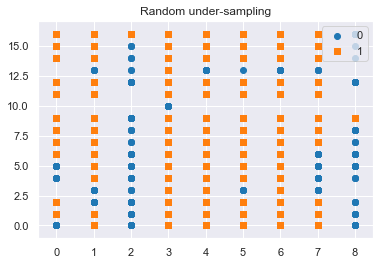

In [75]:
# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_sample(X_train, y_train)

print(x_ros.shape[0] - X.shape[0], 'new random piccked points')
plot_2d_space(x_ros, y_ros, 'Random under-sampling')

In [76]:
naive = GaussianNB()
naive.fit(x_ros, y_ros)

## Make prediction with new model
y_pred = naive.predict(X_test)

## Calculate the accuracy rate of model and compare it to the null accuracy

 
# Calculte accuracy of mmodel
print('Model Accuracy',metrics.accuracy_score(y_test, y_pred))

# Calculate null accuracy
print('Null Acuuracy',metrics.accuracy_score(y_test, [0]*len(y_test)))

# Calculte the mean of y_test (AKA the precentage of 1's)
print("Precentage of 1's",y_test.mean())

# One minus that number will be the percentage of 0's.  This means that if you 
# predict all 0's, you will be correct 1-y_test-mean() percent of the time.
print("Precentage of 0's",1 - y_test.mean())

## Generate a confusion matrix for your predictions.  Use this to calculate the
## sensitivity and specificity of your model.

# Take alook at the confustion matrix
con_mat = metrics.confusion_matrix(y_test, y_pred)
print('\nCon_Matrix\n',con_mat)


# Let's define our true posititves, false positives,
# true negatives, and false negatives 
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat[1][1]
false_pos = con_mat[0][1]


# Sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print ('Percent of Senstivity',sensitivity)

# Specificity: percent of correct predictions when reference 
# value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print ('Percent of specificity',specificity)

Model Accuracy 0.76296840803916
Null Acuuracy 0.9359473411631054
Precentage of 1's 0.0640526588368946
Precentage of 0's 0.9359473411631054

Con_Matrix
 [[42332 13691]
 [  497  3337]]
Percent of Senstivity 0.8703703703703703
Percent of specificity 0.7556182282276922


# Now let's do it with SMOTE

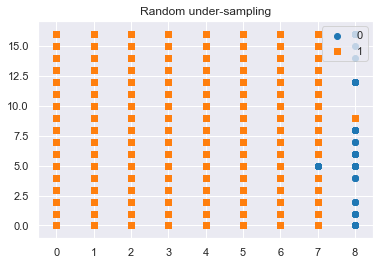

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
x_sm, y_sm = smote.fit_sample(X_train,y_train)

plot_2d_space(x_sm, y_sm, 'Random under-sampling')

In [78]:
naive = GaussianNB()
naive.fit(x_sm, y_sm)

## Make prediction with new model
y_pred = naive.predict(X_test)

## Calculate the accuracy rate of model and compare it to the null accuracy

 
# Calculte accuracy of mmodel
print('Model Accuracy',metrics.accuracy_score(y_test, y_pred))

# classifcation error(missclasfication rate)
print('missclasification rate',1- metrics.accuracy_score(y_test, y_pred))

# Calculate null accuracy
print('Null Acuuracy',metrics.accuracy_score(y_test, [0]*len(y_test)))

# Calculte the mean of y_test (AKA the precentage of 1's)
print("Precentage of 1's",y_test.mean())

# One minus that number will be the percentage of 0's.  This means that if you 
# predict all 0's, you will be correct 1-y_test-mean() percent of the time.
print("Precentage of 0's",1 - y_test.mean())

## Generate a confusion matrix for your predictions.  Use this to calculate the
## sensitivity and specificity of your model.

# Take alook at the confustion matrix
con_mat = metrics.confusion_matrix(y_test, y_pred)
print('\nCon_Matrix\n',con_mat)


# Let's define our true posititves, false positives,
# true negatives, and false negatives 
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat[1][1]
false_pos = con_mat[0][1]


# Sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print ('Percent of Senstivity',sensitivity)

# Specificity: percent of correct predictions when reference 
# value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print ('Percent of specificity',specificity)

Model Accuracy 0.7877608299781145
missclasification rate 0.21223917002188553
Null Acuuracy 0.9359473411631054
Precentage of 1's 0.0640526588368946
Precentage of 0's 0.9359473411631054

Con_Matrix
 [[43973 12050]
 [  654  3180]]
Percent of Senstivity 0.8294209702660407
Percent of specificity 0.7849097692019349


**After comparing, we see that train.smote gives the highest true positive rate and true negative rate. Hence, we learn that SMOTE technique outperforms the other two sampling methods.
Now, let’s build our model SMOTE data and check our final prediction accuracy.**

In [79]:
# sensitivity: When the actual value is positive, how often is than correct ?
# specifity: when the actual value is negative, how often is the prediction correct ?
# Flase positive rate: when the actual value is negative how often is the prediction incorrrect ?
# Percistion: when a positive value is predicted how often is the predication correct ?

# classification report is really helpful mehtode to check accuracy
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.78      0.87     56023
           1       0.21      0.83      0.33      3834

   micro avg       0.79      0.79      0.79     59857
   macro avg       0.60      0.81      0.60     59857
weighted avg       0.94      0.79      0.84     59857



**The function confusionMatrix. This naive Bayes model predicts 98% of the majority class correctly, but disappoints at minority class prediction (~21%). Let us not get hopeless and try more techniques to improve our accuracy. Remember, the more you hustle, better you get!**

our final score accuracy methode cross val_score lets check it out:

In [80]:
# import and initat cross validation model
# we gonna set cv qual to 10
from sklearn.model_selection import cross_val_score
naive = GaussianNB()
score = cross_val_score(naive, x_sm,y_sm, cv=10, scoring='accuracy' )
print(score)
print("The Best Score",score.mean())

[0.81802403 0.84590565 0.84343569 0.84537161 0.84543148 0.84302817
 0.84643286 0.84060261 0.84333971 0.84331746]
The Best Score 0.8414889281366209


As we see validation or cross validation give us better score.

**Let’s use xgboost algorithm and try to improve our model. We’ll do 5 fold cross validation and 5 round random search for parameter tuning. Finally, we’ll build the model using the best tuned parameters**

# Xgboost with rmse score

In [114]:
# import our models
import xgboost as xgb
import xgboost as xgb
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold



In [139]:
# DMatrix is a matric compitable with xgboost for effcicncy 
data_matrix = xgb.DMatrix(data=X, label=y)

In [141]:
X_train, X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2, random_state=123)

In [143]:
from sklearn.metrics import mean_squared_error
xgb_class = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3,
                             learning_rate=0.1, max_depth=6,n_estimators=10,
                        )
xgb_class.fit(X_train, y_train)
pred = xgb_class.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,pred))
print("RMSE: %f" % (rmse))

RMSE: 0.234836


# XGBoost k-fold Cross Validation using 

In [145]:
params = {"objective":'binary:logistic', "colsample_bytree":0.3,
                             "learning_rate":0.1, "max_depth":6,"n_estimators":10}
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=5,
                   num_boost_round=50,early_stopping_rounds=10,
                   metrics='rmse', as_pandas=True,seed=1000)
print(cv_results.head())
print(cv_results["test-rmse-mean"].tail(1))

[18:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[18:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[18:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[18:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[18:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[18:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[18:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[18:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[18:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes

[18:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[18:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[18:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[18:20:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[18:20:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[18:20:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[18:20:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[18:20:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[18:20:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes

[18:21:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[18:21:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[18:21:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[18:21:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[18:21:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[18:21:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[18:21:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[18:21:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[18:21:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes,

[18:22:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[18:22:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[18:22:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[18:22:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[18:22:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[18:22:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[18:22:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[18:22:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[18:22:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes,

# XGBoost GridSearch cv validation

In [151]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
               }

In [181]:

grid = GridSearchCV(xgb_class, param_grid=parameters, n_jobs=5,scoring='roc_auc')
grid.fit(X_train,y_train)
preds = grid.predict(X_test)


C:\Users\A\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [174]:
print(grid.best_estimator_)
print(grid.best_score_ * 2-1)
print(grid.best_params_)
 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=11, missing=None, n_estimators=5,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8)
0.8642567823099918
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8}


In [186]:
print("RMSE: %f" % (rmse))
print(cv_results["test-rmse-mean"].tail(1) )
print(grid.best_score_ * 2-1)


RMSE: 0.234836
49    0.185755
Name: test-rmse-mean, dtype: float64
0.8642567823099918


In [193]:
 
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     56171
           1       0.83      0.21      0.34      3686

   micro avg       0.95      0.95      0.95     59857
   macro avg       0.89      0.60      0.65     59857
weighted avg       0.94      0.95      0.93     59857



**As we can see, xgboost has outperformed naive Bayes model’s accuracy (as expected!). Can we further improve ?
Until now, we’ve used all the variables in the data. Shall we try using the important ones?**

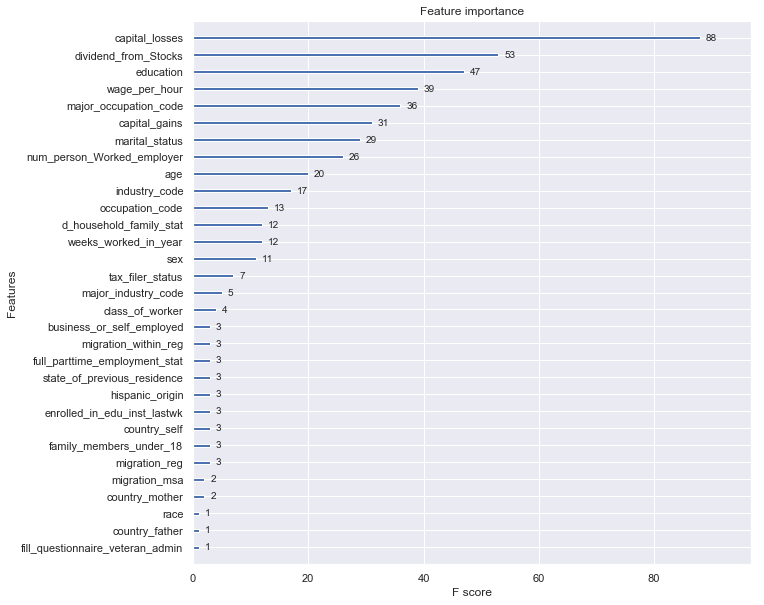

In [197]:
xgb.plot_importance(xgb_class)
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

In [218]:
# print out feature important
print(xgb_class.feature_importances_)

[0.00826446 0.09710744 0.00619835 0.05991736 0.01033058 0.07438017
 0.00206612 0.00619835 0.02272727 0.         0.         0.00619835
 0.01446281 0.         0.00619835 0.02479339 0.         0.00413223
 0.00619835 0.00619835 0.         0.         0.00619835 0.00206612
 0.00413223 0.00619835 0.         0.00206612 0.04132231 0.03512397
 0.0268595  0.08057851 0.06404959 0.18181819 0.10950413 0.05371901
 0.00619835 0.         0.02479339 0.        ]


Feature importance scores can be used for machine learning model to selcet the best and train them again and in our we case we going choose 20 feature or feature that within the threshold.

we going to use SelectFromModel calss to takes model and transform a dataset into a subset with selected feature

In [237]:
# import our select model
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = (xgb_class.feature_importances_)
for thresh in thresholds:
    
    
    #initate the model
    selection = SelectFromModel(xgb_class, threshold=thresh, prefit=True)
    select_Xtrain = selection.transform(X_train)
# train the model
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_Xtrain, y_train)

# eval modle
    select_Xtest = selection.transform(X_test)
    y_pred = selection_model.predict(select_Xtest)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_Xtrain.shape[1], accuracy*100.0))




Thresh=0.008, n=17, Accuracy: 95.41%
Thresh=0.097, n=3, Accuracy: 94.31%
Thresh=0.006, n=26, Accuracy: 95.40%
Thresh=0.060, n=7, Accuracy: 94.96%
Thresh=0.010, n=16, Accuracy: 95.40%
Thresh=0.074, n=5, Accuracy: 94.47%
Thresh=0.002, n=31, Accuracy: 95.44%
Thresh=0.006, n=26, Accuracy: 95.40%
Thresh=0.023, n=14, Accuracy: 95.41%
Thresh=0.000, n=40, Accuracy: 95.44%
Thresh=0.000, n=40, Accuracy: 95.44%
Thresh=0.006, n=26, Accuracy: 95.40%
Thresh=0.014, n=15, Accuracy: 95.45%
Thresh=0.000, n=40, Accuracy: 95.44%
Thresh=0.006, n=26, Accuracy: 95.40%
Thresh=0.025, n=13, Accuracy: 95.28%
Thresh=0.000, n=40, Accuracy: 95.44%
Thresh=0.004, n=28, Accuracy: 95.40%
Thresh=0.006, n=26, Accuracy: 95.40%
Thresh=0.006, n=26, Accuracy: 95.40%
Thresh=0.000, n=40, Accuracy: 95.44%
Thresh=0.000, n=40, Accuracy: 95.44%
Thresh=0.006, n=26, Accuracy: 95.40%
Thresh=0.002, n=31, Accuracy: 95.44%
Thresh=0.004, n=28, Accuracy: 95.40%
Thresh=0.006, n=26, Accuracy: 95.40%
Thresh=0.000, n=40, Accuracy: 95.44%
Thre

**We can see that the performance of the model generally decreases with the number of selected features.**

Until now, our model has been making label predictions. The threshold used for making these predictions in 0.5 as seen by:

Due to imbalanced nature of the data, the threshold of 0.5 will always favor the majority class since the probability of a class 1 is quite low. Now, we’ll try a new technique:
Instead of labels, we’ll predict probabilities
Plot and study the AUC curve
Adjust the threshold for better prediction

**Now, let’s look at the probability table thus created:

In [238]:
# print the first ten predicted responces
selection_model.predict(select_Xtest)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [239]:
# # print the first ten predicted probobiltties of income_level
selection_model.predict_proba(select_Xtest)[0:10, :]

array([[9.9958831e-01, 4.1171853e-04],
       [9.5205492e-01, 4.7945108e-02],
       [8.8746500e-01, 1.1253501e-01],
       [9.9957138e-01, 4.2860885e-04],
       [9.8095864e-01, 1.9041337e-02],
       [9.9669862e-01, 3.3013991e-03],
       [9.9663025e-01, 3.3697609e-03],
       [9.8214012e-01, 1.7859859e-02],
       [9.9957138e-01, 4.2860885e-04],
       [7.8863913e-01, 2.1136086e-01]], dtype=float32)

In [240]:
# # print the first ten predicted probobiltties of income_level 1
selection_model.predict_proba(select_Xtest)[0:10, 1]

array([0.00041172, 0.04794511, 0.11253501, 0.00042861, 0.01904134,
       0.0033014 , 0.00336976, 0.01785986, 0.00042861, 0.21136086],
      dtype=float32)

In [277]:
# Store the predicted probabilities for income_level 1
y_pred_prob = selection_model.predict_proba(select_Xtest)[:, 1]

**Since, we have obtained the class probabilities, let’s create a histigrame plot and determine the basis to modify prediction threshold.**

In [242]:
# allow plot to appear inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0,0.5,'Frequancy')

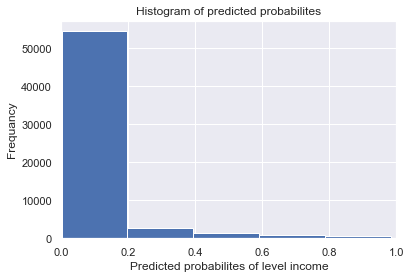

In [243]:
# Histgram for predicted probabilites
plt.hist(y_pred_prob, bins=5)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilites')
plt.xlabel("Predicted probabilites of level income")
plt.ylabel("Frequancy")

Decrase the threshold for predcting income-level in order to increase the sensitvity of the classifier.
And for that to accomplish we gonna use sklearn Binarize

In [261]:
y_pred_prob = y_pred_prob.reshape(1, -1)

In [268]:
#predicted income-level if the predicted probabilites is greater than
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob,0.2)[0]

In [269]:
# print the first 10 predicted probabilites
y_pred_prob[0:10]

array([[0.00041172, 0.04794511, 0.11253501, ..., 0.0564354 , 0.15023813,
        0.00036877]], dtype=float32)

In [270]:
y_pred_class

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [271]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     56171
           1       0.48      0.70      0.57      3686

   micro avg       0.94      0.94      0.94     59857
   macro avg       0.73      0.82      0.77     59857
weighted avg       0.95      0.94      0.94     59857



In [272]:
sensitivity = float(true_pos)/(false_neg + true_pos)
print ('Percent of Senstivity',sensitivity)

Percent of Senstivity 0.8294209702660407


In [273]:
specificity = float(true_neg) / (true_neg + false_pos)
print ('Percent of specificity',specificity)

Percent of specificity 0.7849097692019349


With 0.2 threshold, our model returned better predictions than our previous xgboost model at 0.5 threshold. Thus, you can see that setting threshold using histgram actually affect our model performance. Let’s give one more try.

This model has outperformed all our models i.e. in other words, this is the best model because 78% of the minority classes have been predicted correctly.

# ROC curve and AUC

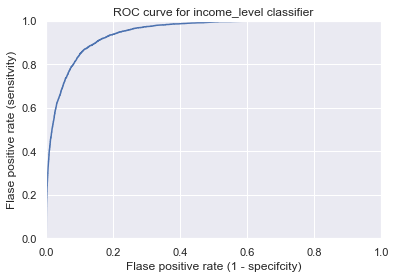

In [278]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for income_level classifier')
plt.xlabel('Flase positive rate (1 - specifcity)')
plt.ylabel('Flase positive rate (sensitvity)')
plt.grid(True)

In [279]:
# AUC percentage of the curve 
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9482535563807644
